In [1]:
import pandas as pd
import glob
import numpy as np
import pickle as pkl
from tqdm import tqdm
import matplotlib.pyplot as plt

# gensim
import gensim
from gensim.utils import simple_preprocess
from gensim.models import LdaModel

from scipy.special import gamma,psi
from scipy import ndimage
from scipy.linalg import det
from numpy import pi
from sklearn.neighbors import NearestNeighbors

In [2]:
# load raw corpus dataframe
with open('data/raw_corpus.pkl', 'rb') as f:
    corpus_df = pkl.load(f)
    
# load cleaned corpus
with open('data/cleaned_corpus.pkl', 'rb') as f:
    corpus = pkl.load(f)

In [3]:
# load model
fname = f'trained_models/trained_lda_model_17'
lda_model = LdaModel.load(fname)

In [4]:
corpus_df 

,DOI,Year,Journal,Title,Abstract,Affiliation
0,10.1029/91WR01996,1991,Water Resour. Res.,WEIGHTED SUM TRANSFERABLE DISCHARGE PERMIT PRO...,Transferable discharge permit (TDP) programs f...,CANADA
1,10.1029/91WR00590,1991,Water Resour. Res.,RELIABILITY IMPROVEMENTS IN DESIGN OF WATER DI...,Water distribution networks can fail either by...,CANADA
2,10.1029/91WR02077,1991,Water Resour. Res.,A NOTE ON FRACTAL CHANNEL NETWORKS,This paper studies the relation between the st...,ITALY
3,10.1029/91WR01990,1991,Water Resour. Res.,EFFECTS OF SOIL HETEROGENEITY ON PESTICIDE LEA...,Pesticide leaching was simulated numerically a...,NETHERLANDS
4,10.1029/91WR02025,1991,Water Resour. Res.,EFFECT OF CATCHMENT-SCALE SUBSURFACE MIXING ON...,A 3.8-ha watershed on the west coast of New Ze...,USA
5,10.1029/91WR02028,1991,Water Resour. Res.,A MODEL FOR SIMULATING TRANSPORT OF REACTIVE M...,This paper presents the development and demons...,USA
6,10.1029/91WR02270,1991,Water Resour. Res.,TRACER TRANSPORT IN FRACTURES - ANALYSIS OF FI...,A variable-aperture channel model is used as t...,USA
7,10.1029/91WR01405,1991,Water Resour. Res.,A LARGE-SCALE FLOW AND TRACER EXPERIMENT IN GR...,This paper describes the Stripa three-dimensio...,SWEDEN
8,10.1029/91WR01404,1991,Water Resour. Res.,A LARGE-SCALE FLOW AND TRACER EXPERIMENT IN GR...,Water and tracer flow has been monitored in a ...,SWEDEN
9,10.1029/91WR02026,1991,Water Resour. Res.,HYDROLOGIC APPLICATIONS OF THE CONNECTION MACH...,Massively parallel computers will play an incr...,USA


In [5]:
# get a list of all journals
journals = corpus_df.Journal.unique()
journals

array(['Water Resour. Res.', 'Hydrol. Process.',
       'Hydrol. Sci. J.-J. Sci. Hydrol.', 'J. Hydrometeorol.',
       'J. Hydrol.', 'Adv. Water Resour.', 'Hydrol. Earth Syst. Sci.'],
      dtype=object)

In [6]:
# count papers in years
nyear = {}
for y, year in enumerate(corpus_df.Year.unique()):
    nyear[year] = corpus_df.loc[corpus_df.Year == year].shape[0]
sorted(nyear.items())

[('1991', 633),
 ('1992', 667),
 ('1993', 737),
 ('1994', 683),
 ('1995', 987),
 ('1996', 840),
 ('1997', 910),
 ('1998', 872),
 ('1999', 953),
 ('2000', 1010),
 ('2001', 992),
 ('2002', 1135),
 ('2003', 1223),
 ('2004', 1333),
 ('2005', 1226),
 ('2006', 1617),
 ('2007', 1782),
 ('2008', 1837),
 ('2009', 1815),
 ('2010', 1843),
 ('2011', 1953),
 ('2012', 2270),
 ('2013', 2428),
 ('2014', 2718),
 ('2015', 2593),
 ('2016', 2617),
 ('2017', 2663),
 ('2018', 2626),
 ('2019', 2723)]

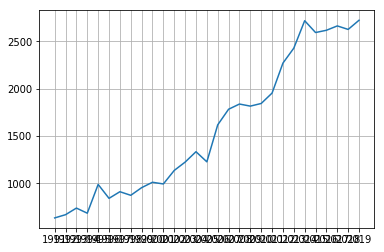

In [7]:
x,y = zip(*sorted(nyear.items()))
plt.plot(x,y)
plt.grid()
plt.show()

In [8]:
# run the model
doc_lda = lda_model[corpus]

In [ ]:
#papers in countries
countries = corpus_df

In [ ]:
# grab the topic probabilities for each paper

# init storage
hm = np.zeros([len(corpus), lda_model.num_topics])

# loop over papers
for paper in tqdm(range(len(corpus))):
    pairs = lda_model[corpus[paper]][0]
    for pair in pairs:
        hm[paper, pair[0]] = pair[1]

In [ ]:
# create time series

# all years where we have data
years = np.unique(corpus_df['Year'])

# init storage (as a dictionary)
popularity_all_journals = {}
popularity_by_journal = np.zeros([len(corpus_df.Journal.unique()), len(years), lda_model.num_topics])

# loop through years
for y, year in enumerate(years):
    
    # extract all papers in this year
    hm_year = hm[corpus_df['Year'] == year,:]

    # calculate topic popularity for this year
    popularity_all_journals[year] = np.sum(hm_year, axis=0) / np.sum(hm_year)
    
    # topic popularity by journal
    for j, journal in enumerate(corpus_df.Journal.unique()):
        jyidx = np.where(np.logical_and((corpus_df.Journal == journal), (corpus_df.Year == year)))[0]
        popularity_by_journal[j,y,:] = np.sum(hm[jyidx,:], axis=0) / np.sum(hm[jyidx,:])

In [ ]:
popularity_by_journal

In [ ]:
def calc_entropy(pmf):
    return -np.nansum(pmf * np.log(pmf))

In [ ]:
# calcualte entropy 
entropy_all_journals = {}
for y, year in enumerate(years):
    entropy_all_journals[year] = calc_entropy(popularity_all_journals[year])

In [ ]:
x,y = zip(*sorted(entropy_all_journals.items()))
plt.plot(x,y)
plt.grid()
plt.show()

In [ ]:
# calcualte entropy 
entropy_by_journal = np.full([len(corpus_df.Journal.unique()), len(years)], np.nan)
for y, year in enumerate(years):
    for j, journal in enumerate(journals):
        entropy_by_journal[j,y] = calc_entropy(popularity_by_journal[j,y,:])

In [ ]:
plt.plot(np.transpose(entropy_by_journal))
plt.grid()
plt.ylim([1.6,2.3])
plt.show()

In [ ]:
__all__=['entropy', 'mutual_information', 'entropy_gaussian']

EPS = np.finfo(float).eps

def nearest_distances(X, k=1):
    '''
    X = array(N,M)
    N = number of points
    M = number of dimensions
    returns the distance to the kth nearest neighbor for every point in X
    '''
    knn = NearestNeighbors(n_neighbors=k + 1)
    knn.fit(X)
    d, _ = knn.kneighbors(X) # the first nearest neighbor is itself
    return d[:, -1] # returns the distance to the kth nearest neighbor

def entropy(X, k=1):
    ''' Returns the entropy of the X.
    Parameters
    ===========
    X : array-like, shape (n_samples, n_features)
        The data the entropy of which is computed
    k : int, optional
        number of nearest neighbors for density estimation
  
    '''

    # Distance to kth nearest neighbor
    r = nearest_distances(X, k) # squared distances
    n, d = X.shape
    volume_unit_ball = (pi**(.5*d)) / gamma(.5*d + 1)
    '''
    F. Perez-Cruz, (2008). Estimation of Information Theoretic Measures
    for Continuous Random Variables. Advances in Neural Information
    Processing Systems 21 (NIPS). Vancouver (Canada), December.
    return d*mean(log(r))+log(volume_unit_ball)+log(n-1)-log(k)
    '''
    return (d*np.mean(np.log(r + np.finfo(X.dtype).eps))
            + np.log(volume_unit_ball) + psi(n) - psi(k))


In [ ]:
entropy_year_journal = entropy(hm)
entropy_year_journal